### HealthifyUs is a US-based startup company that gives nutrition advice to its customers to help them stay healthy and fit. They have collected data about various food items sold in the market along with their nutrient composition. The data contains information about the amount of the following nutrients in food items - Protein, Fat, Vitamin C, and Fibre. The food items can be segmented based on their nutrient composition so that suggestions can be provided based on the customer’s nutrition requirements.

### Attribute information:
* Protein: protein content in the food products
* Fat: fat content in the food products
* vitaminC: vitamin C content in the food products
* Fibre: Fibre content in the food products
* Product: Name of the food products

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
nutrition_data = pd.read_csv("Nutrient Composition Dataset.csv")

<IPython.core.display.Javascript object>

In [3]:
# shape

nutrition_data.shape

(1746, 6)

<IPython.core.display.Javascript object>

In [4]:
nutrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      1746 non-null   int64  
 1   Protein   1746 non-null   float64
 2   Fat       1746 non-null   float64
 3   vitaminC  1746 non-null   float64
 4   Fibre     1746 non-null   float64
 5   Product   1746 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


<IPython.core.display.Javascript object>

In [5]:
nutrition_data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No,1746.0,873.500000,504.171102,1.000000,437.250000,873.500000,1309.750000,1746.000000
Protein,1746.0,0.922470,0.627128,0.000128,0.435853,0.813025,1.295106,4.016890
Fat,1746.0,0.900091,0.634617,0.000267,0.394784,0.804687,1.298988,3.979364
vitaminC,1746.0,0.900146,0.623847,0.000029,0.419103,0.796290,1.280870,4.013322
Fibre,1746.0,0.900830,0.626875,0.002579,0.389124,0.820783,1.295732,3.570331


<IPython.core.display.Javascript object>

In [80]:
1.295106 - 0.435853

0.859253

<IPython.core.display.Javascript object>

In [6]:
nutrition_data.head(20)

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"
5,6,1.267150,0.234292,0.546766,0.386447,"Alcoholic beverage, liqueur, coffee, 63 proof"
6,7,0.351557,0.677176,0.551181,1.102799,"Alcoholic beverage, pina colada, canned"
7,8,0.635325,1.223652,0.330483,0.675459,"Alcoholic beverage, tequila sunrise, canned"
8,9,0.527588,1.250053,1.247867,0.889896,"Apples, raw, without skin"
9,10,0.598690,0.068307,1.423195,0.339158,"Alcoholic beverage, whiskey sour, canned"


<IPython.core.display.Javascript object>

In [7]:
# copying the data to another variable to avoid any changes to original data
nutrition_df = nutrition_data.copy()

<IPython.core.display.Javascript object>

In [8]:
nutrition_df.drop("S.No", axis=1, inplace=True)


<IPython.core.display.Javascript object>

In [9]:
nutrition_df.head(20)

,Protein,Fat,vitaminC,Fibre,Product
0,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"
5,1.267150,0.234292,0.546766,0.386447,"Alcoholic beverage, liqueur, coffee, 63 proof"
6,0.351557,0.677176,0.551181,1.102799,"Alcoholic beverage, pina colada, canned"
7,0.635325,1.223652,0.330483,0.675459,"Alcoholic beverage, tequila sunrise, canned"
8,0.527588,1.250053,1.247867,0.889896,"Apples, raw, without skin"
9,0.598690,0.068307,1.423195,0.339158,"Alcoholic beverage, whiskey sour, canned"


<IPython.core.display.Javascript object>

In [10]:
# checking for missing values
nutrition_df.isna().sum()

Protein     0
Fat         0
vitaminC    0
Fibre       0
Product     0
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
# let's check for duplicate observations
nutrition_df.duplicated().sum()

# no duplicates

0

<IPython.core.display.Javascript object>

In [12]:
nutrition_df.isna().sum()

Protein     0
Fat         0
vitaminC    0
Fibre       0
Product     0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
(nutrition_df.Product == "Unknown").sum()

913

<IPython.core.display.Javascript object>

In [14]:
nutrition_df[(nutrition_df.Product == "Unknown")].describe().T

,count,mean,std,min,25%,50%,75%,max
Protein,913.0,0.928618,0.638862,0.000128,0.423001,0.807116,1.302051,3.694141
Fat,913.0,0.890806,0.631714,0.000267,0.377359,0.789770,1.299495,3.106521
vitaminC,913.0,0.745778,0.533203,0.000029,0.337955,0.648044,1.068838,4.013322
Fibre,913.0,0.746345,0.541802,0.002579,0.300284,0.640745,1.098604,2.894282


<IPython.core.display.Javascript object>

In [15]:
nutrition_df[(nutrition_df.Product == "Unknown")].sample(10)

,Protein,Fat,vitaminC,Fibre,Product
624,0.916016,0.166120,0.784961,0.077231,Unknown
1045,0.928302,0.462085,0.887341,0.763976,Unknown
1604,2.410116,2.017817,0.372618,0.098662,Unknown
962,0.463983,0.265069,0.189970,0.140407,Unknown
1686,0.337666,2.080887,0.383547,0.091638,Unknown
1535,1.326386,0.313681,0.250728,0.547423,Unknown
1111,1.079150,0.114838,0.388889,0.754686,Unknown
1066,0.767350,0.294201,0.451759,0.167965,Unknown
1467,0.944192,0.294184,1.753224,1.674880,Unknown
1524,0.495863,1.563376,1.264714,1.374431,Unknown


<IPython.core.display.Javascript object>

In [16]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )


#    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
        print()
        print(f"Column name : {col} has total {df[col].nunique()} unique values")
        print()
        print(df[col].value_counts()[0:10])
        print()
        print("-" * 50)


print_null_info(nutrition_df)

,missing count,missing %


<IPython.core.display.Javascript object>

In [17]:
print_category_value_counts(nutrition_df, ["Product"])



Column name : Product has total 834 unique values

Unknown                                                                                                          913
Lamb, Australian, imported, fresh, leg, shank half, separable lean only, trimmed to 1/8" fat, cooked, roasted      1
Chicken breast, oven-roasted, fat-free, sliced                                                                     1
Cream, sour, cultured                                                                                              1
Pork, fresh, loin, blade (roasts), boneless, separable lean and fat, cooked, roasted                               1
Veal, breast, whole, boneless, separable lean and fat, cooked, braised                                             1
Peanuts, all types, dry-roasted, without salt                                                                      1
Crackers, rusk toast                                                                                               1
Bread, fren

<IPython.core.display.Javascript object>

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

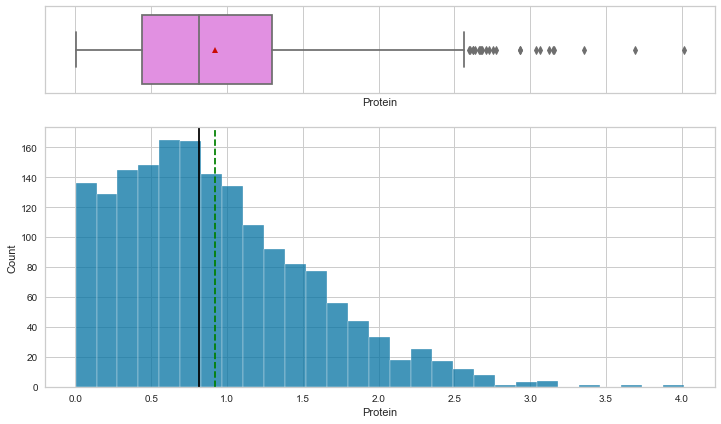

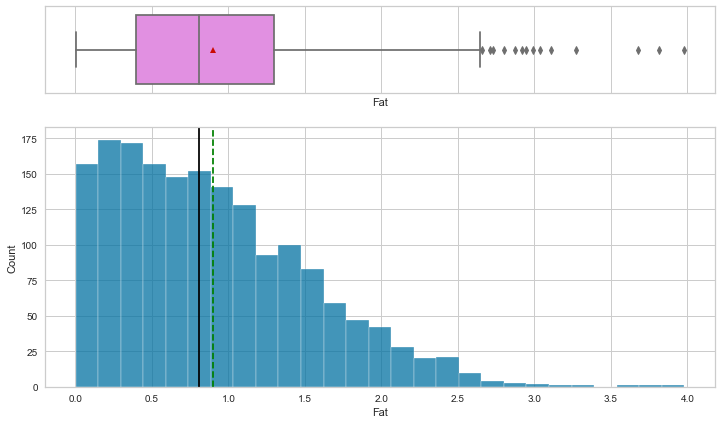

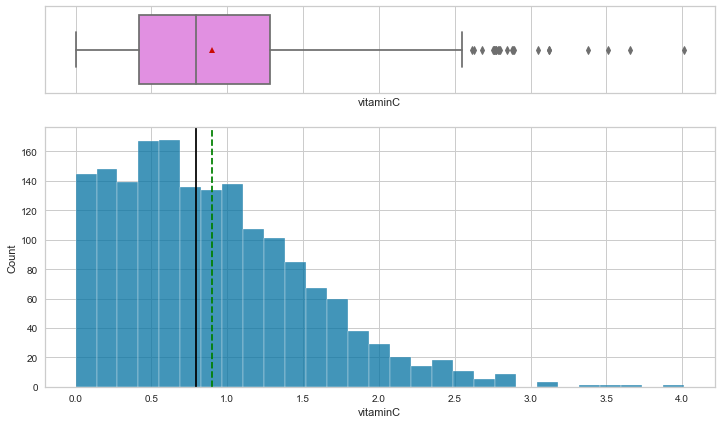

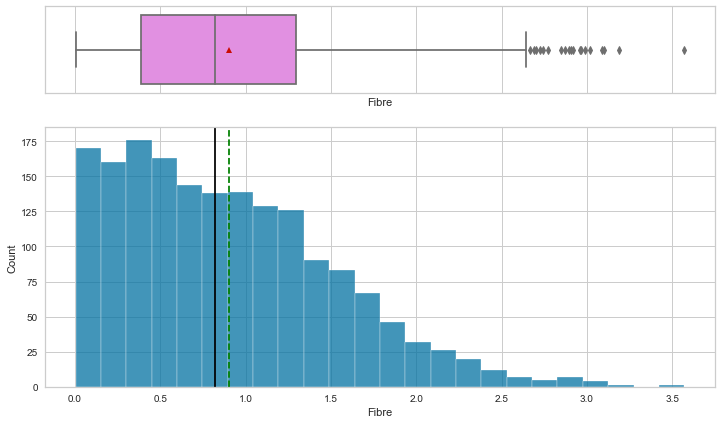

<IPython.core.display.Javascript object>

In [19]:
# selecting numerical columns
num_col = nutrition_df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(nutrition_df, item)

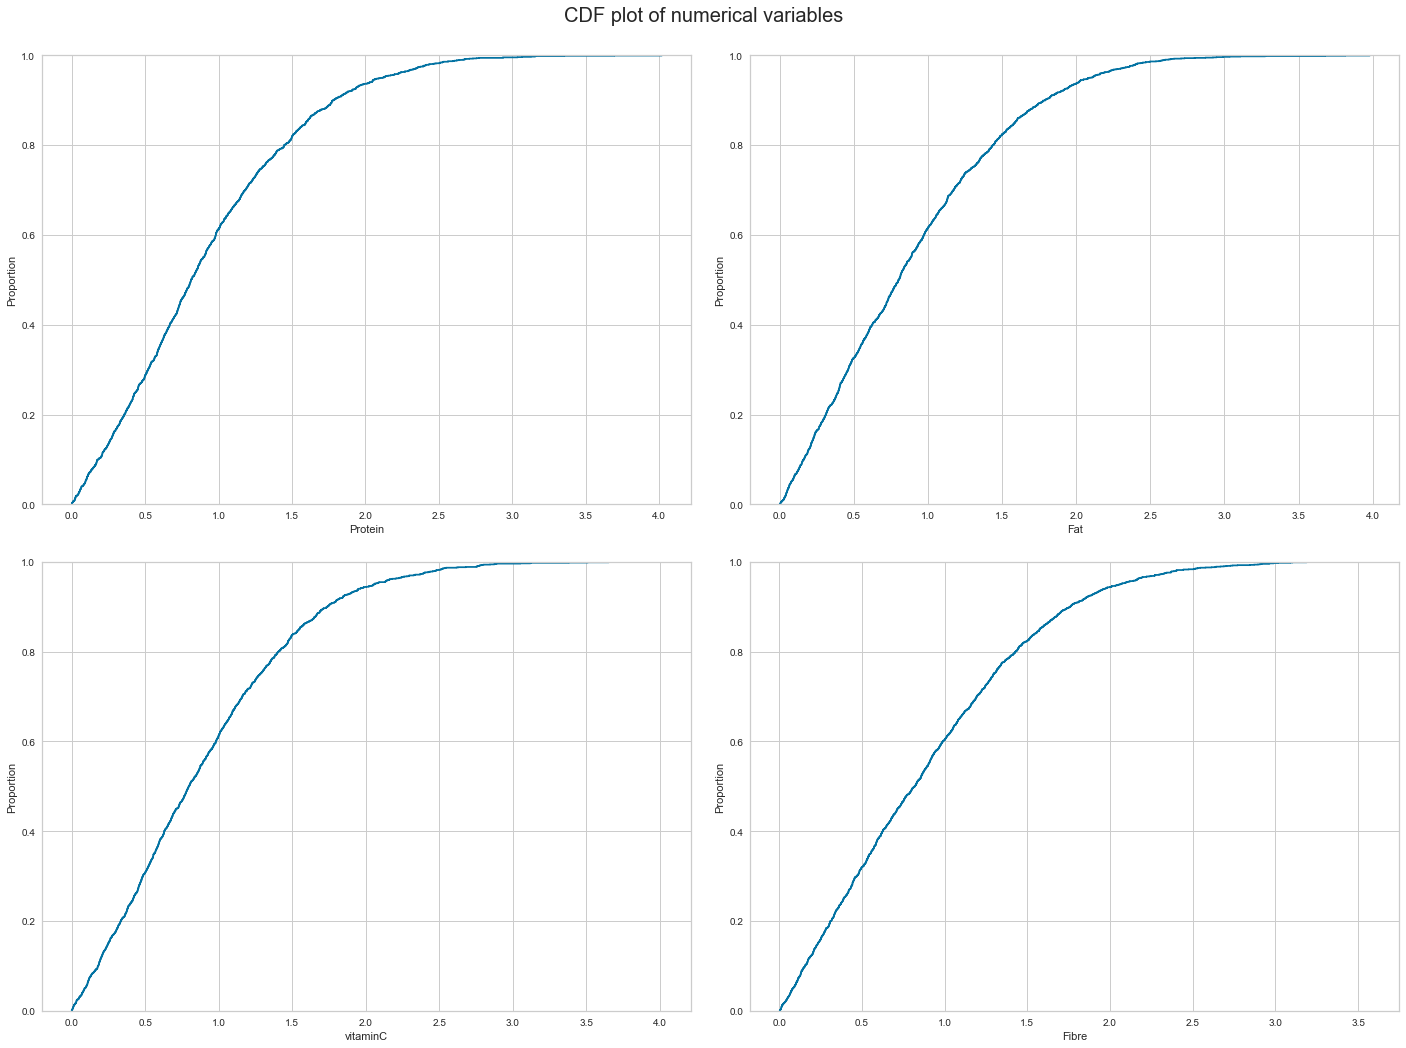

<IPython.core.display.Javascript object>

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(2):
    sns.ecdfplot(ax=axes[ii][0], x=nutrition_df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=nutrition_df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

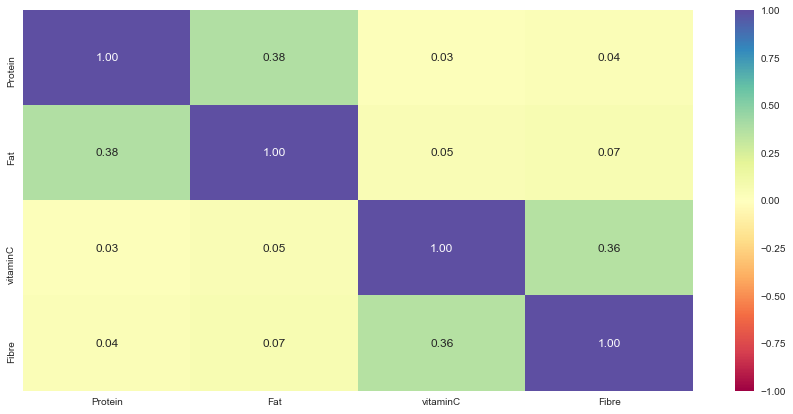

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    nutrition_df[num_col].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

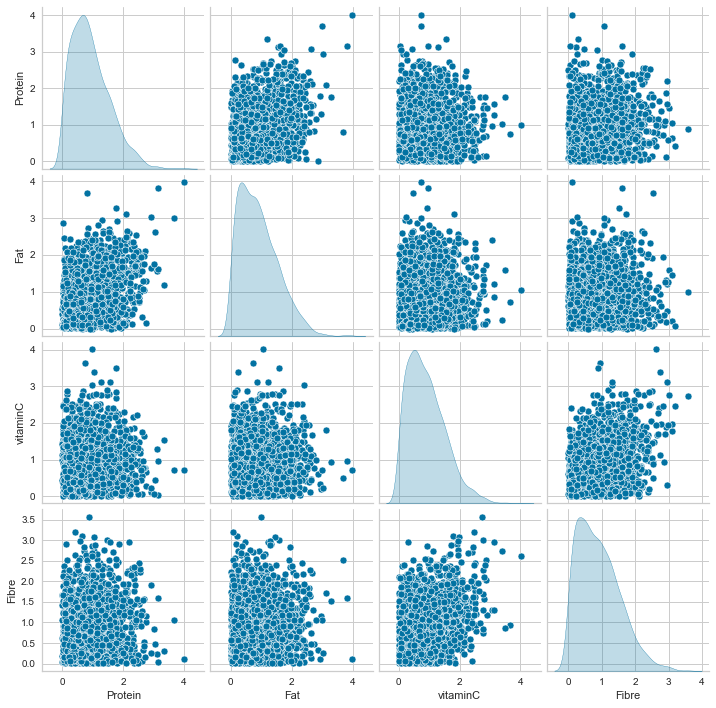

<IPython.core.display.Javascript object>

In [22]:
sns.pairplot(data=nutrition_df[num_col], diag_kind="kde")
plt.show()

In [23]:
# variables used for clustering
num_col

['Protein', 'Fat', 'vitaminC', 'Fibre']

<IPython.core.display.Javascript object>

In [24]:
nutrition_df = nutrition_df.copy()
nutrition_df1 = nutrition_df.copy()
nutrition_df2 = nutrition_df.copy()

<IPython.core.display.Javascript object>

In [84]:
from scipy.stats import zscore

<IPython.core.display.Javascript object>

In [98]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = nutrition_df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

# df_tmp = nutrition_df1.copy()

# subset_scaled = df_tmp[num_col].apply(zscore)
subset_scaled

array([[-0.74982491,  0.42689221,  0.28721155,  1.27993582],
       [ 2.23083483, -0.30457764, -0.88197165, -0.38707923],
       [-0.06047753,  0.45155068,  2.45065917,  1.72927991],
       ...,
       [-0.51892724, -0.27135409,  0.21075457, -1.02973939],
       [-0.27824368,  1.29613739,  0.67308657,  0.03121439],
       [ 1.74070185, -0.51055187, -0.61594975,  1.01463024]])

<IPython.core.display.Javascript object>

In [99]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

In [100]:
subset_scaled_df.head(10)

,Protein,Fat,vitaminC,Fibre
0,-0.749825,0.426892,0.287212,1.279936
1,2.230835,-0.304578,-0.881972,-0.387079
2,-0.060478,0.451551,2.450659,1.729280
3,-0.330121,-0.508314,-1.008903,-0.848201
4,-1.259850,-0.560451,-1.255896,-0.548145
5,0.549775,-1.049436,-0.566616,-0.820785
6,-0.910622,-0.351360,-0.559536,0.322276
7,-0.458005,0.509999,-0.913407,-0.359618
8,-0.629847,0.551613,0.557541,-0.017446
9,-0.516439,-1.311063,0.838666,-0.896243


<IPython.core.display.Javascript object>

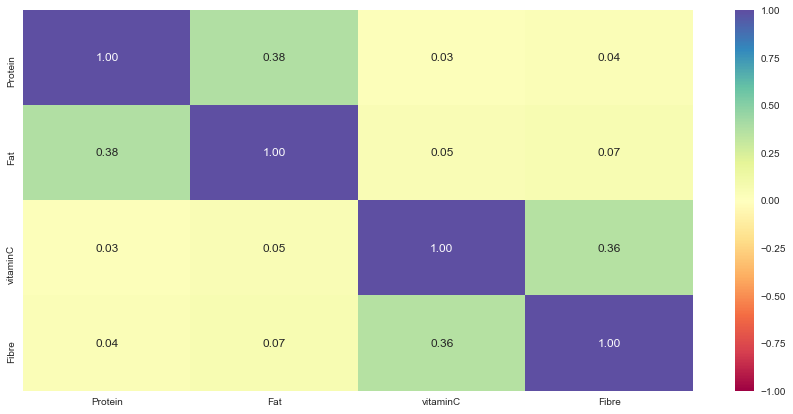

<IPython.core.display.Javascript object>

In [101]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    subset_scaled_df[num_col].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 1.8583720449271957
Number of Clusters: 2 	Average Distortion: 1.6124606178344718
Number of Clusters: 3 	Average Distortion: 1.4342071603373008
Number of Clusters: 4 	Average Distortion: 1.3600718086857313
Number of Clusters: 5 	Average Distortion: 1.2917884110651359
Number of Clusters: 6 	Average Distortion: 1.231230559644666
Number of Clusters: 7 	Average Distortion: 1.1817865200448268
Number of Clusters: 8 	Average Distortion: 1.1462975605509398
Number of Clusters: 9 	Average Distortion: 1.1156896736383155
Number of Clusters: 10 	Average Distortion: 1.0889552325938823
Number of Clusters: 11 	Average Distortion: 1.0604428198716378
Number of Clusters: 12 	Average Distortion: 1.0411801445239004
Number of Clusters: 13 	Average Distortion: 1.0215091739488822
Number of Clusters: 14 	Average Distortion: 0.9999641065979964
Number of Clusters: 15 	Average Distortion: 0.9868891231544885


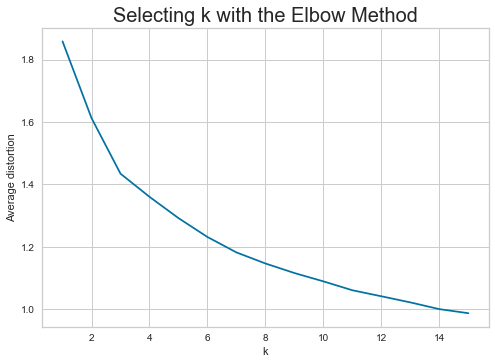

<IPython.core.display.Javascript object>

In [102]:
clusters = range(1, 16)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Appropriate value for k seems to be 3 or 4.**

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.25496367847338175)
For n_clusters = 3, the silhouette score is 0.2531861555258712)
For n_clusters = 4, the silhouette score is 0.20491939596109465)
For n_clusters = 5, the silhouette score is 0.19745041333696137)
For n_clusters = 6, the silhouette score is 0.207259377989639)
For n_clusters = 7, the silhouette score is 0.20880440017330532)
For n_clusters = 8, the silhouette score is 0.20967229666664064)
For n_clusters = 9, the silhouette score is 0.21157601984087682)
For n_clusters = 10, the silhouette score is 0.21061445331916365)
For n_clusters = 11, the silhouette score is 0.20149616154781075)
For n_clusters = 12, the silhouette score is 0.20037003393863342)
For n_clusters = 13, the silhouette score is 0.19848439554137132)
For n_clusters = 14, the silhouette score is 0.18887134549630646)
For n_clusters = 15, the silhouette score is 0.1811877654243162)


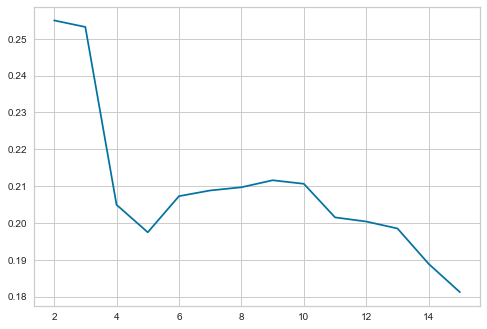

<IPython.core.display.Javascript object>

In [103]:
sil_score = []
cluster_list = list(range(2, 16))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Silhouette score for 3 is higher than that for 4. So, we will choose 3 as value of k.**

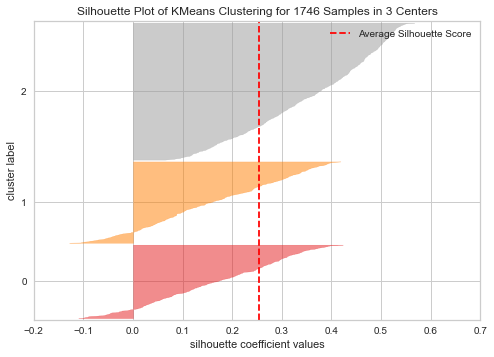

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1746 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [31]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

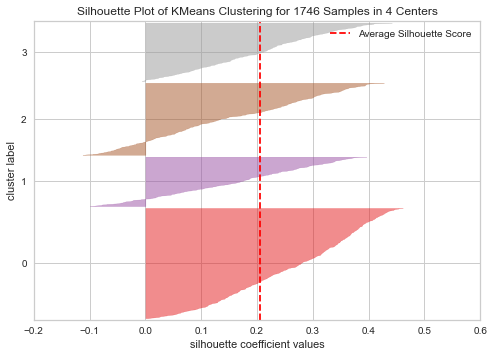

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1746 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [32]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [104]:
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [105]:
# adding kmeans cluster labels to the original and scaled dataframes

nutrition_df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [106]:
cluster_profile = nutrition_df.groupby("K_means_segments").mean()
cluster_profile

,Protein,Fat,vitaminC,Fibre
K_means_segments,,,,
0,0.768839,0.804329,1.558258,1.549467
1,1.552066,1.556525,0.791801,0.824236
2,0.630631,0.561205,0.611007,0.597900


<IPython.core.display.Javascript object>

In [107]:
cluster_profile["count_in_each_segments"] = (
    nutrition_df.groupby("K_means_segments")["Protein"].count().values
)

<IPython.core.display.Javascript object>

In [108]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Protein,Fat,vitaminC,Fibre,count_in_each_segments
K_means_segments,,,,,
0,0.768839,0.804329,1.558258,1.549467,440
1,1.552066,1.556525,0.791801,0.824236,487
2,0.630631,0.561205,0.611007,0.597900,819


<IPython.core.display.Javascript object>

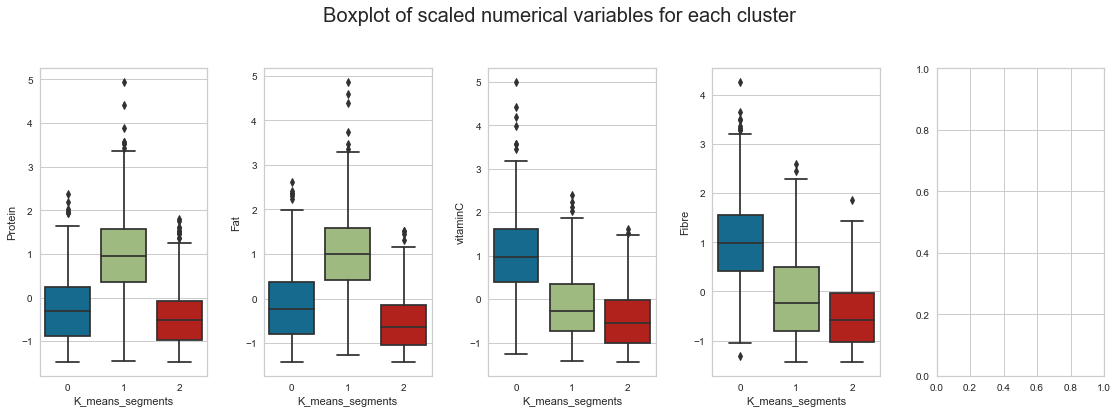

<IPython.core.display.Javascript object>

In [109]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

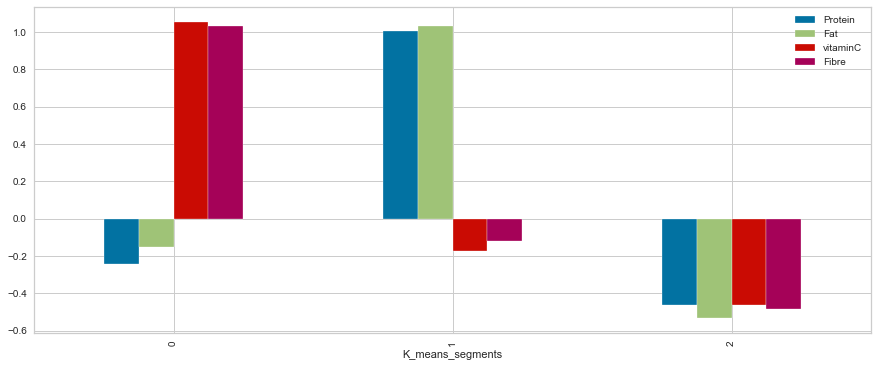

<IPython.core.display.Javascript object>

In [39]:
subset_scaled_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

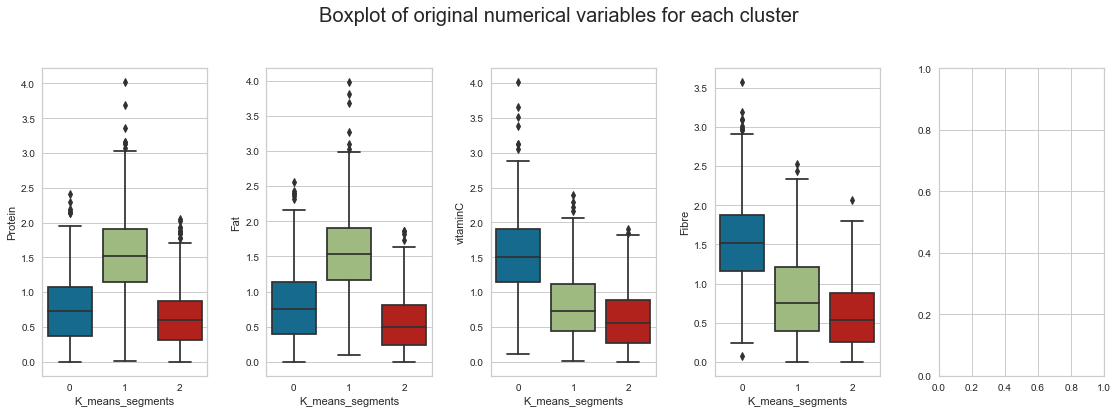

<IPython.core.display.Javascript object>

In [40]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii],
        y=nutrition_df[num_col[counter]],
        x=nutrition_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

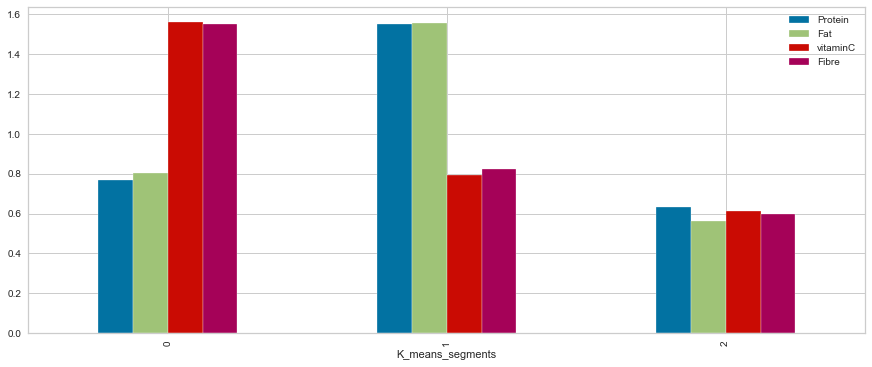

<IPython.core.display.Javascript object>

In [41]:
nutrition_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

In [42]:
# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

<IPython.core.display.Javascript object>

In [43]:
# variables used for clustering
num_col

['Protein', 'Fat', 'vitaminC', 'Fibre']

<IPython.core.display.Javascript object>

In [44]:
nutrition_df = nutrition_df1.copy()

<IPython.core.display.Javascript object>

In [45]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = nutrition_df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [46]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## Hierarchical Clustering

In [47]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )

        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
    print()

Cophenetic correlation for Euclidean distance and single linkage is 0.6811464508068673.
Cophenetic correlation for Euclidean distance and complete linkage is 0.4869572069304841.
Cophenetic correlation for Euclidean distance and average linkage is 0.6521952320724567.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.5964392177574143.

Cophenetic correlation for Chebyshev distance and single linkage is 0.6834725971520486.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.5213370944106545.
Cophenetic correlation for Chebyshev distance and average linkage is 0.6740825578245622.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5904807988600125.

Cophenetic correlation for Mahalanobis distance and single linkage is 0.6695240907637672.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.548999847813267.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6321687610056733.
Cophenetic c

<IPython.core.display.Javascript object>

In [48]:
high_cophenet_corr

0.6834725971520486

<IPython.core.display.Javascript object>

In [49]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.6834725971520486, which is obtained with Chebyshev distance and single linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [50]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6811464508068673.
Cophenetic correlation for complete linkage is 0.4869572069304841.
Cophenetic correlation for average linkage is 0.6521952320724567.
Cophenetic correlation for centroid linkage is 0.6623548586574843.
Cophenetic correlation for ward linkage is 0.45786619671858036.
Cophenetic correlation for weighted linkage is 0.5964392177574143.


<IPython.core.display.Javascript object>

In [51]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.6811464508068673, which is obtained with single linkage.


<IPython.core.display.Javascript object>


**Let's see the dendrograms for the different linkage methods.**

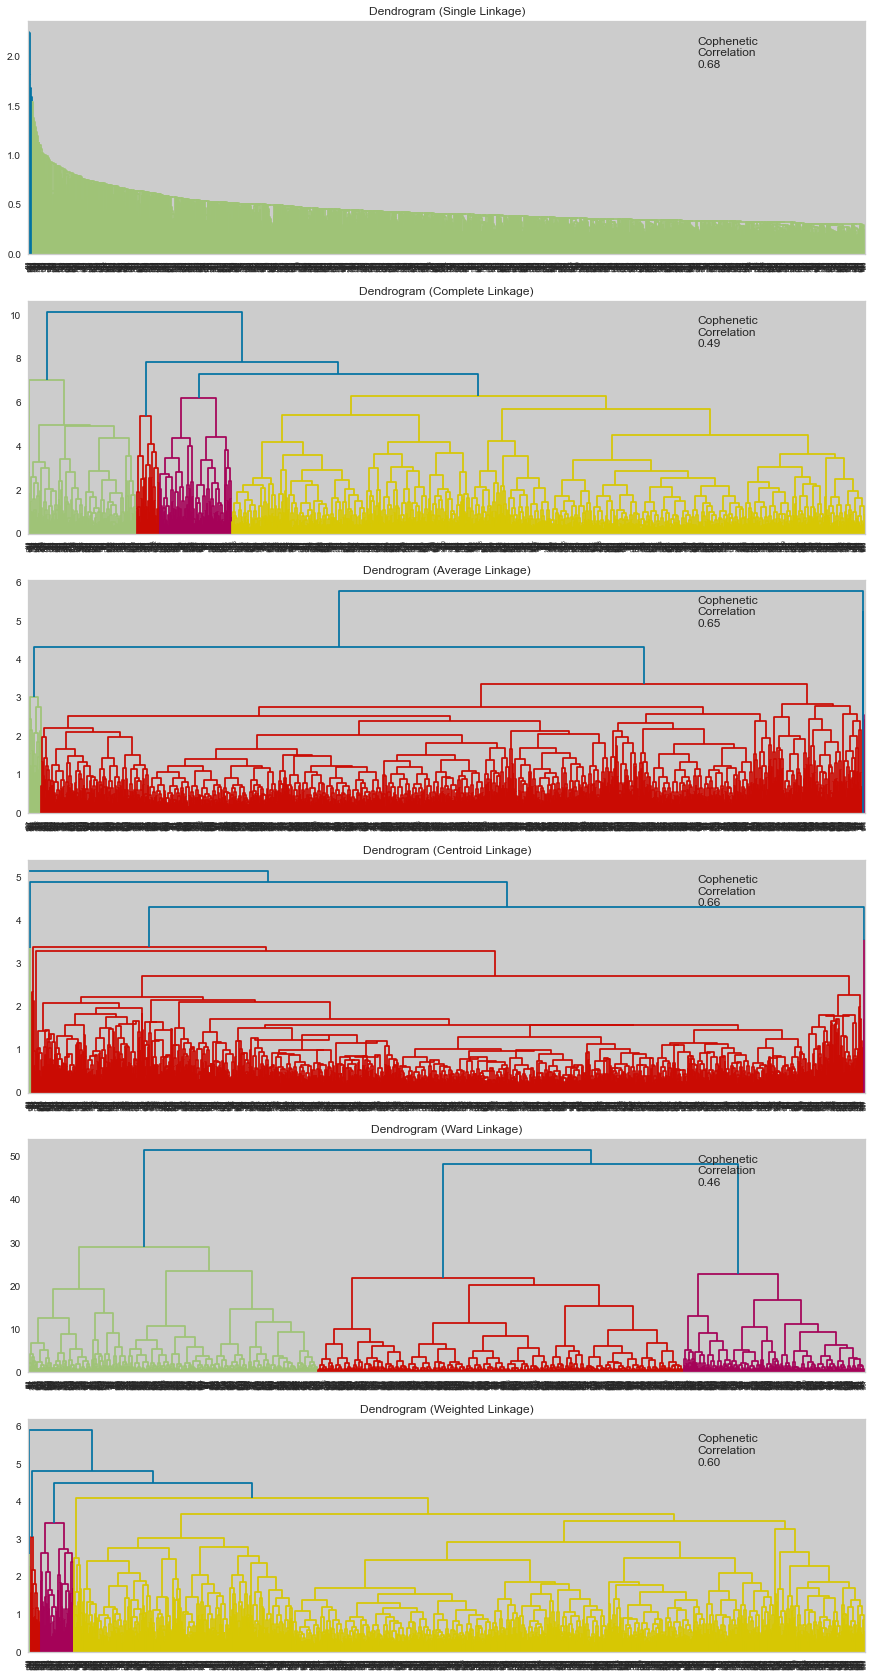

<IPython.core.display.Javascript object>

In [52]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [53]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.681146
1,complete,0.486957
2,average,0.652195
3,centroid,0.662355
4,ward,0.457866
5,weighted,0.596439


<IPython.core.display.Javascript object>

**Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

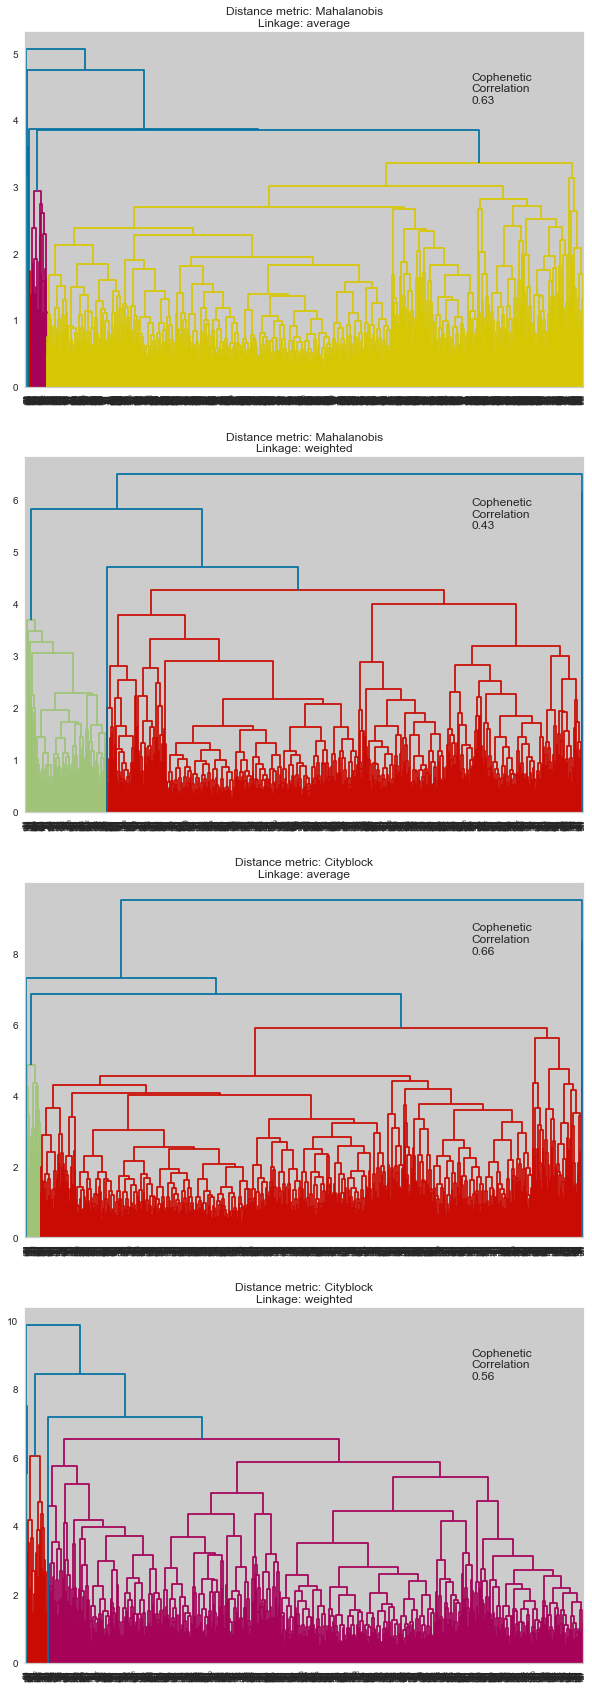

<IPython.core.display.Javascript object>

In [54]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Let's create 3 clusters.**

In [55]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

In [56]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
nutrition_df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [57]:
cluster_profile = nutrition_df.groupby("HC_Clusters").mean()
cluster_profile

,Protein,Fat,vitaminC,Fibre
HC_Clusters,,,,
0,1.362797,1.500302,0.789416,0.835766
1,0.721904,0.728258,1.593485,1.552764
2,0.672623,0.509011,0.643212,0.628231


<IPython.core.display.Javascript object>

In [58]:
cluster_profile["count_in_each_segments"] = (
    nutrition_df.groupby("HC_Clusters")["Protein"].count().values
)

<IPython.core.display.Javascript object>

In [59]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Protein,Fat,vitaminC,Fibre,count_in_each_segments
HC_Clusters,,,,,
0,1.362797,1.500302,0.789416,0.835766,605
1,0.721904,0.728258,1.593485,1.552764,379
2,0.672623,0.509011,0.643212,0.628231,762


<IPython.core.display.Javascript object>

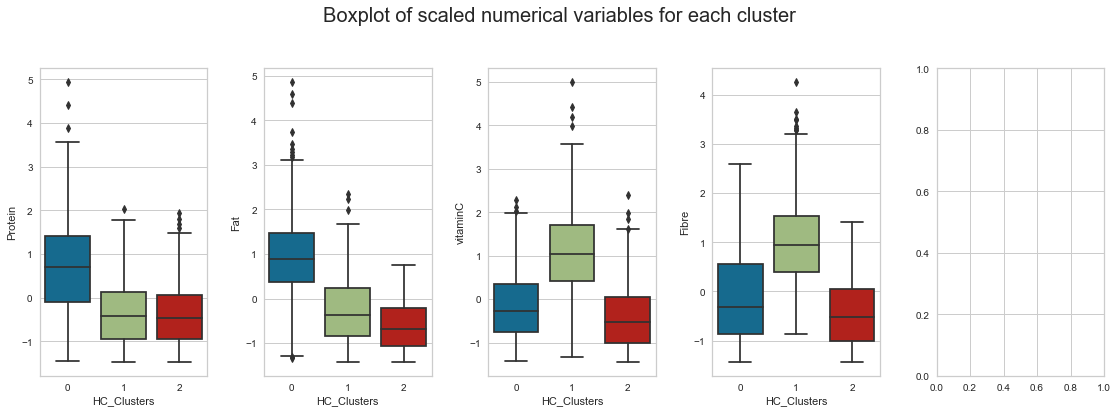

<IPython.core.display.Javascript object>

In [60]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

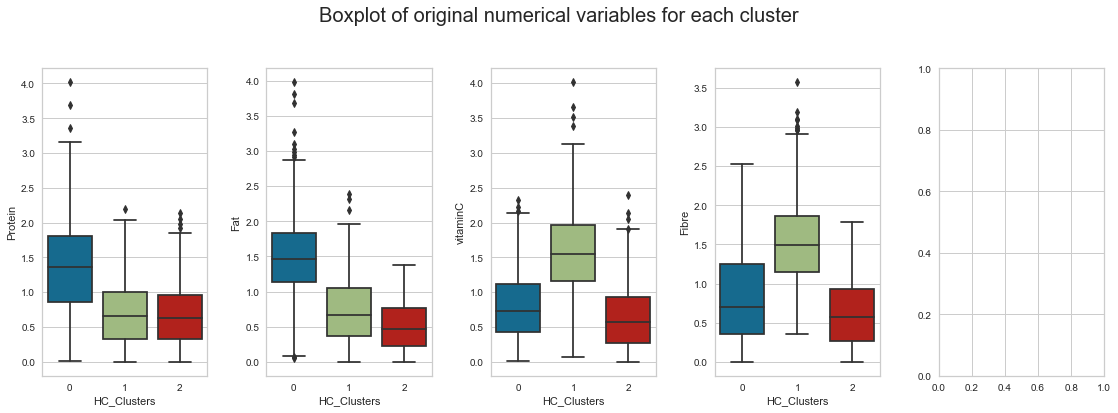

<IPython.core.display.Javascript object>

In [61]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii], y=nutrition_df[num_col[counter]], x=nutrition_df["HC_Clusters"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='HC_Clusters'>

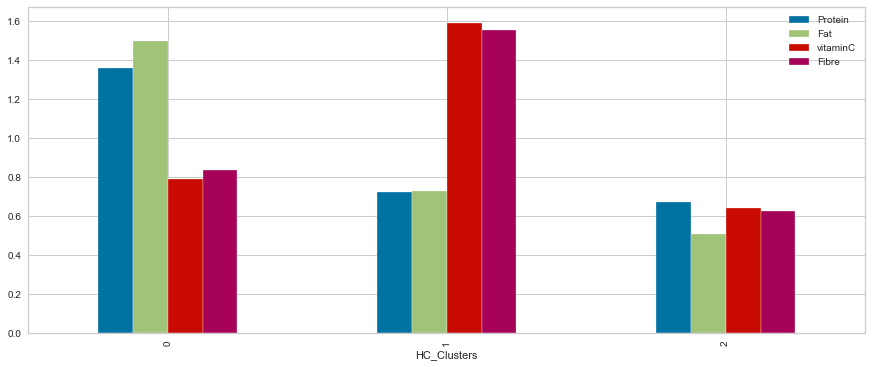

<IPython.core.display.Javascript object>

In [62]:
nutrition_df.groupby("HC_Clusters").mean().plot.bar(figsize=(15, 6))

## Applying Principal Component Analysis (PCA)

In [63]:
# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

In [64]:
nutrition_df = nutrition_df1.copy()
subset = nutrition_df[num_col].copy()

<IPython.core.display.Javascript object>

In [65]:
# normalizing the features
X = StandardScaler().fit_transform(subset)

<IPython.core.display.Javascript object>

In [66]:
X.shape

(1746, 4)

<IPython.core.display.Javascript object>

In [67]:
pca = PCA(n_components=4, random_state=1)
pca_data = pca.fit_transform(X)

<IPython.core.display.Javascript object>

In [68]:
print("Explained variance per principal component: {}".format(pca.explained_variance_))

Explained variance per principal component: [1.46663112 1.2799764  0.63842786 0.61725689]


<IPython.core.display.Javascript object>

In [69]:
print(pca.components_)

[[ 0.5136229   0.53984503  0.45922822  0.48359933]
 [ 0.49012979  0.45263957 -0.54059078 -0.51249568]
 [ 0.04389671 -0.00722082  0.70488588 -0.70792431]
 [-0.70287794  0.70967078  0.00263582 -0.04819792]]


<IPython.core.display.Javascript object>

**Let's convert the above result into a dataframe.**

In [70]:
pca_df = pd.DataFrame(
    data=pca_data,
    columns=[
        "Principal Component 1",
        "Principal Component 2",
        "Principal Component 3",
        "Principal Component 4",
    ],
)
pca_df.tail()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
1741,1.718031,0.315123,-0.325057,0.851473
1742,1.737894,2.164307,1.556621,-0.308087
1743,-0.814219,0.036638,0.856716,0.222357
1744,0.880997,0.070446,0.430779,1.115672
1745,0.826258,0.435057,-1.072358,-1.636351


<IPython.core.display.Javascript object>

In [71]:
print(
    "Explained variance per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained variance per principal component: [0.36644778 0.31981083 0.15951555 0.15422584]


<IPython.core.display.Javascript object>

In [72]:
print("Explained variance per principal component: {}".format(pca.explained_variance_))

Explained variance per principal component: [1.46663112 1.2799764  0.63842786 0.61725689]


<IPython.core.display.Javascript object>

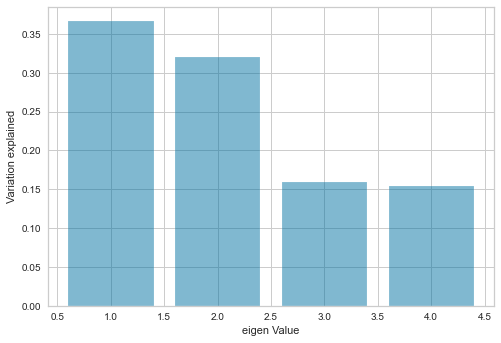

<IPython.core.display.Javascript object>

In [73]:
plt.bar(list(range(1, 5)), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.ylabel("Variation explained")
plt.xlabel("eigen Value")
plt.show()

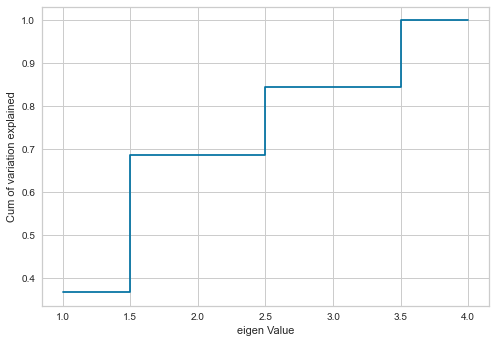

<IPython.core.display.Javascript object>

In [74]:
plt.step(list(range(1, 5)), np.cumsum(pca.explained_variance_ratio_), where="mid")
plt.ylabel("Cum of variation explained")
plt.xlabel("eigen Value")
plt.show()

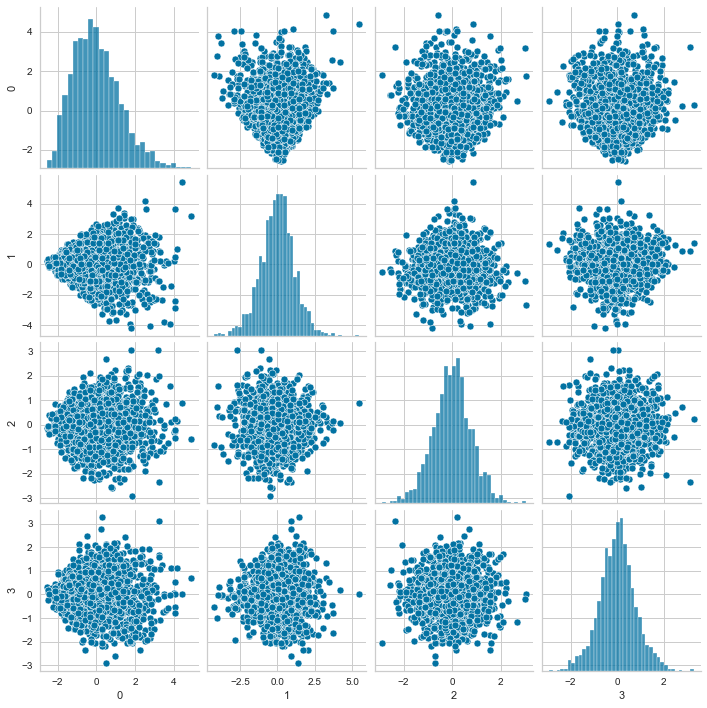

<IPython.core.display.Javascript object>

In [75]:
sns.pairplot(pd.DataFrame(pca_data))

## Add-on: Applying t-distributed Stochastic Neighbor Embedding (t-SNE)

In [76]:
nutrition_df = nutrition_df1.copy()
subset = nutrition_df[num_col].copy()
# normalizing the features
X = StandardScaler().fit_transform(subset)

<IPython.core.display.Javascript object>

In [77]:
# to perform t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=1)
tsne_data = tsne.fit_transform(X)

<IPython.core.display.Javascript object>

In [78]:
tsne_df = pd.DataFrame(
    data=tsne_data, columns=["Component 1", "Component 2", "Component 3"]
)
tsne_df.tail()

,Component 1,Component 2,Component 3
1741,-3.395945,1.369369,-7.607846
1742,-9.135400,-3.415057,-7.234284
1743,0.945371,-1.849242,4.838864
1744,-3.233654,3.532819,-4.414553
1745,-2.050729,-6.790331,-4.120143


<IPython.core.display.Javascript object>

## Visualizing the data in the lower dimension